In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to preprocess the data (select feature and target columns)
def preprocess_data(data, feature_column, target_column):
    X = data[[feature_column]]
    y = data[target_column]
    return X, y

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to make predictions using the trained model
def predict(model, X):
    return model.predict(X)

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

# Main program
def main():
    # Load dataset
    data = load_data(r"C:\Users\nidhi\Downloads\10 - Java_AST.csv")

    # Preprocess data (replace with actual column names)
    X, y = preprocess_data(data, 'ast_300', 'Final_Marks')

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model
    model = train_linear_regression(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = predict(model, X_train)
    y_test_pred = predict(model, X_test)

    # Evaluate the model on training data
    train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    print(f"Training Data: MSE={train_mse}, RMSE={train_rmse}, R²={train_r2}")

    # Evaluate the model on testing data
    test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    print(f"Testing Data: MSE={test_mse}, RMSE={test_rmse}, R²={test_r2}")

# Run the main function
if __name__ == "__main__":
    main()


Training Data: MSE=5.391386449593901, RMSE=2.3219359271077873, R²=0.07612767798541231
Testing Data: MSE=5.190435653593526, RMSE=2.2782527633240184, R²=0.1345207231017448


# A4

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

def perform_kmeans_clustering(file_path, n_clusters=2):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Drop the target variable (assuming it's the last column)
    X = data.iloc[:, :-1]

    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X)

    # Get the labels and cluster centers
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    # Print the results
    print("Cluster Labels:\n", labels)
    print("\nCluster Centers:\n", centers)

# Example usage:
file_path = r"C:\Users\nidhi\Downloads\10 - Java_AST.csv"
perform_kmeans_clustering(file_path)

Cluster Labels:
 [0 1 0 ... 1 1 1]

Cluster Centers:
 [[ 0.47079832  0.35587863  0.57667748 ...  1.51664791  2.34877629
   6.15555556]
 [-0.28106883 -0.59299252  1.28362672 ...  1.71069124  2.26859981
   4.4270557 ]]


# A5

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def calculate_clustering_metrics(X, n_clusters=2, random_state=42):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10).fit(X)
    
    # Calculate Silhouette Score
    silhouette = silhouette_score(X, kmeans.labels_)
    
    # Calculate Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X, kmeans.labels_)
    
    return silhouette, ch_score, db_index

# Example usage:
file_path = r"C:\Users\nidhi\Downloads\10 - Java_AST.csv"
data = pd.read_csv(file_path)

# Drop the target variable (assuming it's the last column)
X = data.iloc[:, :-1]

silhouette, ch_score, db_index = calculate_clustering_metrics(X)
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.20790727877169826
Calinski-Harabasz Score: 242.6544241730034
Davies-Bouldin Index: 2.089105102669589


# A6

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

def evaluate_kmeans_clustering(file_path, k_values, random_state=42):
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Drop the target variable (assuming it's the last column)
    X = data.iloc[:, :-1]
    
    silhouette_scores = []
    ch_scores = []
    db_indices = []

    for k in k_values:
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10).fit(X)
        
        # Calculate the scores
        silhouette = silhouette_score(X, kmeans.labels_)
        ch_score = calinski_harabasz_score(X, kmeans.labels_)
        db_index = davies_bouldin_score(X, kmeans.labels_)
        
        # Append scores to lists
        silhouette_scores.append(silhouette)
        ch_scores.append(ch_score)
        db_indices.append(db_index)

    return silhouette_scores, ch_scores, db_indices

def plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices):
    # Plot the results
    plt.figure(figsize=(16, 8))
    
    # Silhouette Score
    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    
    # Calinski-Harabasz Score
    plt.subplot(1, 3, 2)
    plt.plot(k_values, ch_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')
    
    # Davies-Bouldin Index
    plt.subplot(1, 3, 3)
    plt.plot(k_values, db_indices, marker='o')
    plt.title('Davies-Bouldin Index vs. k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    
    plt.tight_layout()
    plt.show()

# Example usage:
file_path = r"C:\Users\nidhi\Downloads\10 - Java_AST.csv"
k_values = range(2, 11)  # Testing k from 2 to 10

silhouette_scores, ch_scores, db_indices = evaluate_kmeans_clustering(file_path, k_values)
plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices)

<Figure size 1600x800 with 3 Axes>

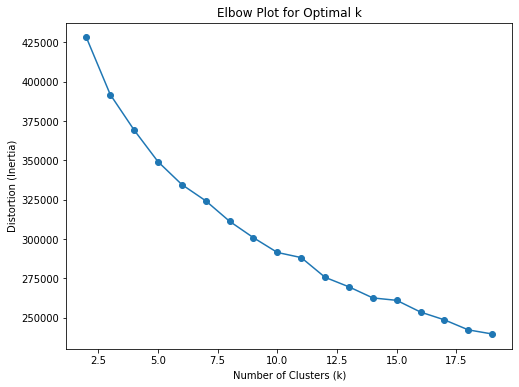

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_elbow_method(file_path, k_range):
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Drop the target variable (assuming it's the last column)
    X = data.iloc[:, :-1]

    # List to store the distortions (inertia) for each k
    distortions = []

    for k in k_range:
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
        
        # Append the inertia (distortion) to the list
        distortions.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, distortions, marker='o')
    plt.title('Elbow Plot for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.show()

# Example usage:
file_path = r"C:\Users\nidhi\Downloads\10 - Java_AST.csv"
k_range = range(2, 20)  # Testing k from 2 to 19

plot_elbow_method(file_path, k_range)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to preprocess the data (select features and target column)
def preprocess_data(data, target_column):
    # Remove highly correlated features
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

    # Drop these columns from the feature set
    feature_columns = [col for col in data.columns if col not in to_drop and col != target_column]
    
    X = data[feature_columns]
    y = data[target_column]
    return X, y

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to make predictions using the trained model
def predict(model, X):
    return model.predict(X)

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Main program
def main():
    # Load dataset
    data = load_data(r"C:\Users\Gurram Bhavya Reddy\OneDrive\Desktop\ML lab\10 - Java_AST.csv")

    # Preprocess data (replace 'target_column' with the actual target column name)
    target_column = 'Final_Marks'  # Replace with your actual target column name
    X, y = preprocess_data(data, target_column)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model
    model = train_linear_regression(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = predict(model, X_train)
    y_test_pred = predict(model, X_test)

    # Evaluate the model on training data
    train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)
    print(f"Training Data: MSE={train_mse}, RMSE={train_rmse}, MAPE={train_mape:.2f}%, R²={train_r2}")

    # Evaluate the model on testing data
    test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)
    print(f"Testing Data: MSE={test_mse}, RMSE={test_rmse}, MAPE={test_mape:.2f}%, R²={test_r2}")


# A2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to preprocess the data (select features and target column)
def preprocess_data(data, target_column):
    # Remove highly correlated features
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

    # Drop these columns from the feature set
    feature_columns = [col for col in data.columns if col not in to_drop and col != target_column]
    
    X = data[feature_columns]
    y = data[target_column]
    return X, y

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to make predictions using the trained model
def predict(model, X):
    return model.predict(X)

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Main program
def main():
    # Load dataset
    data = load_data(r"C:\Users\nidhi\Downloads\10 - Java_AST.csv")

    # Preprocess data (replace 'target_column' with the actual target column name)
    target_column = 'Final_Marks'  # Replace with your actual target column name
    X, y = preprocess_data(data, target_column)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model
    model = train_linear_regression(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = predict(model, X_train)
    y_test_pred = predict(model, X_test)

    # Evaluate the model on training data
    train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)
    print(f"Training Data: MSE={train_mse}, RMSE={train_rmse}, MAPE={train_mape:.2f}%, R²={train_r2}")

    # Evaluate the model on testing data
    test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)
    print(f"Testing Data: MSE={test_mse}, RMSE={test_rmse}, MAPE={test_mape:.2f}%, R²={test_r2}")

if __name__ == "__main__":
    main()


Training Data: MSE=0.5685789783340341, RMSE=0.7540417616644546, MAPE=inf%, R²=0.9025678485722882
Testing Data: MSE=27.894392105669805, RMSE=5.281514186828415, MAPE=109.27%, R²=-3.6512508622310174


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to load the dataset
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to preprocess the data (select multiple features and target column)
def preprocess_data(data, target_column):
    # Remove highly correlated features
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than 0.9
    to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

    # Drop these columns from the feature set
    feature_columns = [col for col in data.columns if col not in to_drop and col != target_column]
    
    X = data[feature_columns]
    y = data[target_column]
    return X, y

# Function to split data into training and test sets
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a linear regression model
def train_linear_regression(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model's performance
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Main program
def main():
    # Load dataset
    data = load_data(r"C:\Users\nidhi\Downloads\10 - Java_AST.csv")

    # Preprocess data (replace 'target_column' with the actual target column name)
    target_column = 'Final_Marks'  # Replace with your actual target column name
    X, y = preprocess_data(data, target_column)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train the model using all selected features
    model = train_linear_regression(X_train, y_train)

    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training data
    train_mse, train_rmse, train_mape, train_r2 = evaluate_model(y_train, y_train_pred)
    print(f"Training Data: MSE={train_mse}, RMSE={train_rmse}, MAPE={train_mape:.2f}%, R²={train_r2}")

    # Evaluate the model on testing data
    test_mse, test_rmse, test_mape, test_r2 = evaluate_model(y_test, y_test_pred)
    print(f"Testing Data: MSE={test_mse}, RMSE={test_rmse}, MAPE={test_mape:.2f}%, R²={test_r2}")

if __name__ == "__main__":
    main()


Training Data: MSE=0.5685789783340341, RMSE=0.7540417616644546, MAPE=inf%, R²=0.9025678485722882
Testing Data: MSE=27.894392105669805, RMSE=5.281514186828415, MAPE=109.27%, R²=-3.6512508622310174
